<a href="https://colab.research.google.com/github/jacob-siby/yT_st_analysis/blob/main/Copy_of_aiProj_sentAnly_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 49.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
os.chdir("/content/drive/My Drive/ML_Project/ML2")

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy


import warnings
warnings.filterwarnings("ignore")

In [9]:
from textblob import TextBlob
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [10]:
ls

'Copy of aiProj-prepro.ipynb'                         english_comments.csv
'Copy of aiProj-sentAnly_Logistic-regression.ipynb'   ML_project_data.csv


In [11]:
data = pd.read_csv("english_comments.csv")

In [12]:
data.head()

,Comments,clean_comments,language
0,"Premiere Pro, DaVinci Resolve 17, FCPX and XCo...","Premiere Pro, DaVinci Resolve 17, FCPX and XCo...",en
1,"When Galaxy Tab finally caught up, Apple made ...","When Galaxy Tab finally caught up, Apple made ...",en
2,You can play Dota and CSGO?,You can play Dota and CSGO?,en
3,"Fire ? intro! I think You’re right, iPad OS 15...","Fire ? intro! I think You’re right, iPad OS 15...",en
4,still waiting for comments from professionals ...,still waiting for comments from professionals ...,en


In [13]:
data.shape

(17093, 3)

In [15]:
data['polarity'] = data['clean_comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [16]:
data.head()

,Comments,clean_comments,language,polarity
0,"Premiere Pro, DaVinci Resolve 17, FCPX and XCo...","Premiere Pro, DaVinci Resolve 17, FCPX and XCo...",en,0.000000
1,"When Galaxy Tab finally caught up, Apple made ...","When Galaxy Tab finally caught up, Apple made ...",en,0.200000
2,You can play Dota and CSGO?,You can play Dota and CSGO?,en,0.000000
3,"Fire ? intro! I think You’re right, iPad OS 15...","Fire ? intro! I think You’re right, iPad OS 15...",en,0.142857
4,still waiting for comments from professionals ...,still waiting for comments from professionals ...,en,0.166667


Shuffle the dataset

In [17]:
data = data.sample(frac=1).reset_index(drop=True)

In [18]:
data['pol_cat']  = 0

In [19]:
data['pol_cat'][data.polarity > 0] = 1
data['pol_cat'][data.polarity <= 0] = -1

In [21]:
data.head()

,Comments,clean_comments,language,polarity,pol_cat
0,Mods are the reason I'll always prefer PC but ...,Mods are the reason I'll always prefer PC but ...,en,0.600000,1
1,Compact phones really are attractive. I hope t...,Compact phones really are attractive. I hope t...,en,0.500000,1
2,"Great work, as always! What's the wallpaper on...","Great work, as always! What's the wallpaper on...",en,1.000000,1
3,@Harshit Gupta 1) your talk of applications th...,@Harshit Gupta 1) your talk of applications th...,en,0.098993,1
4,@Fishy boy 17 I made a 24 slide google slide a...,@Fishy boy 17 I made a 24 slide google slide a...,en,0.600000,1


Comment polarity

In [22]:
data['pol_cat'].value_counts()

-1    8780
 1    8313
Name: pol_cat, dtype: int64

In [23]:
data_pos = data[data['pol_cat'] == 1]
data_pos = data_pos.reset_index(drop = True)

data_neg = data[data['pol_cat'] == -1]
data_neg = data_neg.reset_index(drop = True)

In [24]:
data_pos.head()

,Comments,clean_comments,language,polarity,pol_cat
0,Mods are the reason I'll always prefer PC but ...,Mods are the reason I'll always prefer PC but ...,en,0.600000,1
1,Compact phones really are attractive. I hope t...,Compact phones really are attractive. I hope t...,en,0.500000,1
2,"Great work, as always! What's the wallpaper on...","Great work, as always! What's the wallpaper on...",en,1.000000,1
3,@Harshit Gupta 1) your talk of applications th...,@Harshit Gupta 1) your talk of applications th...,en,0.098993,1
4,@Fishy boy 17 I made a 24 slide google slide a...,@Fishy boy 17 I made a 24 slide google slide a...,en,0.600000,1


In [25]:
data_pos.shape

(8313, 5)

In [26]:
data_neg.head()

,Comments,clean_comments,language,polarity,pol_cat
0,@Ryedog yeah but that means less future exclus...,@Ryedog yeah but that means less future exclus...,en,-0.083333,-1
1,I'm gonna buy this,I'm gonna buy this,en,0.000000,-1
2,@michael angelo D which game? which resolution...,@michael angelo D which game? which resolution...,en,-0.200000,-1
3,so intel for work?? and amd for gaming??,so intel for work?? and amd for gaming??,en,0.000000,-1
4,have you tried moving your hands? also i think...,have you tried moving your hands? also i think...,en,0.000000,-1


In [27]:
data_pos['clean_comments'][1]

'Compact phones really are attractive. I hope this Zenfone 8 will start a compact phone trend.'

-1    8780
 1    8313
Name: pol_cat, dtype: int64

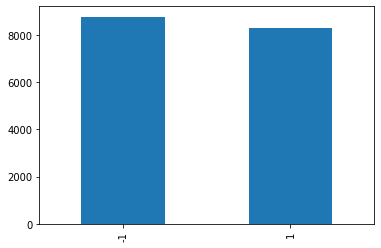

In [29]:
data.pol_cat.value_counts().plot.bar()
data.pol_cat.value_counts()

**Data Preprocessing**
Lower the text in comments

In [33]:
data['clean_comments'] = data['clean_comments'].str.lower()

In [34]:
data['clean_comments'].head()

0    mods are the reason i'll always prefer pc but ...
1    compact phones really are attractive. i hope t...
2    great work, as always! what's the wallpaper on...
3    @harshit gupta 1) your talk of applications th...
4    @fishy boy 17 i made a 24 slide google slide a...
Name: clean_comments, dtype: object

In [35]:
data.describe()

,polarity,pol_cat
count,17093.000000,17093.000000
mean,0.129546,-0.027321
std,0.300336,0.999656
min,-1.000000,-1.000000
25%,0.000000,-1.000000
50%,0.000000,-1.000000
75%,0.283333,1.000000
max,1.000000,1.000000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17093 entries, 0 to 17092
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Comments        17093 non-null  object 
 1   clean_comments  17093 non-null  object 
 2   language        17093 non-null  object 
 3   polarity        17093 non-null  float64
 4   pol_cat         17093 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 667.8+ KB


In [37]:
data['clean_comments'][0]

"mods are the reason i'll always prefer pc but to each their own."

In [38]:
data['clean_comments'][0].strip()

"mods are the reason i'll always prefer pc but to each their own."

In [39]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
import nltk

In [45]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [46]:
stop_words = set(stopwords.words('english'))

In [47]:
data['clean_comments'] = data['clean_comments'].str.strip()

In [48]:
train = data.copy()

In [49]:
train['clean_comments'] = train['clean_comments'].str.strip()

In [50]:

train['clean_comments'][0]

"mods are the reason i'll always prefer pc but to each their own."

In [51]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [52]:
data['stop_comments'] = data['clean_comments'].apply(lambda x : remove_stopwords(x))

In [54]:
data.head()

,Comments,clean_comments,language,polarity,pol_cat,stop_comments
0,Mods are the reason I'll always prefer PC but ...,mods are the reason i'll always prefer pc but ...,en,0.600000,1,mods reason 'll always prefer pc .
1,Compact phones really are attractive. I hope t...,compact phones really are attractive. i hope t...,en,0.500000,1,compact phones really attractive . hope zenfon...
2,"Great work, as always! What's the wallpaper on...","great work, as always! what's the wallpaper on...",en,1.000000,1,"great work , always ! 's wallpaper 12.9 ?"
3,@Harshit Gupta 1) your talk of applications th...,@harshit gupta 1) your talk of applications th...,en,0.098993,1,@ harshit gupta 1 ) talk applications `` data ...
4,@Fishy boy 17 I made a 24 slide google slide a...,@fishy boy 17 i made a 24 slide google slide a...,en,0.600000,1,@ fishy boy 17 made 24 slide google slide 'm s...


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [57]:
X_train.shape

(13674,)

In [58]:
X_test.shape

(3419,)

In [59]:
data['pol_cat'].value_counts()

-1    8780
 1    8313
Name: pol_cat, dtype: int64

**Logistic Regression**

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [62]:
tf_train.shape

(13674, 14713)

In [63]:
print(vect.vocabulary_)

{'proud': 10234, 'never': 8860, 'console': 3257, 'entire': 4775, 'life': 7673, 'late': 7521, '90s': 784, 'today': 13224, 'felt': 5207, 'necessity': 8806, 'rush': 11186, 'new': 8863, 'generation': 5762, 'playing': 9821, 'times': 13183, 'genres': 5775, 'biggest': 2029, 'catalogue': 2642, 'games': 5688, 'world': 14419, 'emulators': 4712, 'mods': 8498, 'cessnafun': 2703, 'reading': 10527, 'comment': 3070, 'going': 5906, 'buy': 2475, 'pc': 9586, 'cause': 2653, 'got': 5945, 'ton': 13242, 'free': 5543, 'egs': 4616, 'checked': 2772, 'bundle': 2431, 'gamestop': 5690, 'waiting': 14055, 'confirmation': 3214, 'email': 4670, 'really': 10548, 'like': 7694, 'setup': 11569, 'feels': 5197, 'cozy': 3448, 'conversation': 3325, 'retcon': 10907, 'dbz': 3762, 'false': 5099, 'information': 6848, 'technically': 12889, 'switch': 12736, 'outsold': 9348, 'ps': 10250, 'sold': 12054, 'xbox': 14510, 'worldwide': 14421, 'expected': 4962, 'tho': 13085, 'many': 8067, 'ppl': 9985, 'wo': 14364, 'abandon': 860, 'game': 5

In [64]:
vocab = vect.vocabulary_

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tf_train,y_train)

LogisticRegression()

accuracy

In [66]:
lr.score(tf_train,y_train)

0.9586075764224075

In [67]:
lr.score(tf_test,y_test)

0.8876864580286633

making prediction

In [68]:
expected = y_test
predicted = lr.predict(tf_test)

ploting confusion matrix

In [69]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [70]:
pip install mlxtend

[[1427  249]
 [ 135 1608]]


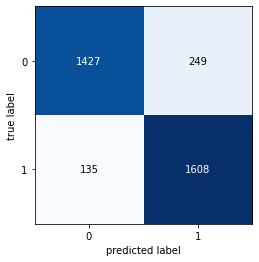

In [71]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,-1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [72]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

          -1       0.87      0.92      0.89      1743
           1       0.91      0.85      0.88      1676

    accuracy                           0.89      3419
   macro avg       0.89      0.89      0.89      3419
weighted avg       0.89      0.89      0.89      3419



In [73]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.8873708050236773

Other Algos

In [75]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [77]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

**SVM**

In [101]:
model = SVC(kernel='linear')
scores = cross_val_score(model, tf_train, y_train, scoring='accuracy', cv=cv)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.889 (0.005)


In [102]:
model.fit(tf_train,y_train)

SVC(kernel='linear')

In [103]:

expected = y_test
predicted = model.predict(tf_test)
model.score(tf_test,y_test)
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

          -1       0.88      0.92      0.90      1743
           1       0.91      0.87      0.89      1676

    accuracy                           0.89      3419
   macro avg       0.89      0.89      0.89      3419
weighted avg       0.89      0.89      0.89      3419



**Random Forest**

In [85]:
model = RandomForestClassifier()
scores = cross_val_score(model, tf_train, y_train, scoring='accuracy', cv=cv)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.881 (0.004)


In [86]:
model.fit(tf_train,y_train)

RandomForestClassifier()

In [87]:

expected = y_test
predicted = model.predict(tf_test)
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

          -1       0.89      0.88      0.89      1743
           1       0.88      0.89      0.88      1676

    accuracy                           0.89      3419
   macro avg       0.89      0.89      0.89      3419
weighted avg       0.89      0.89      0.89      3419



**KNN**


In [89]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(model, tf_train, y_train, scoring='accuracy', cv=cv)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.635 (0.011)


In [90]:
model.fit(tf_train,y_train)

KNeighborsClassifier()

In [91]:

expected = y_test
predicted = model.predict(tf_test)
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

          -1       0.59      0.97      0.73      1743
           1       0.92      0.29      0.44      1676

    accuracy                           0.64      3419
   macro avg       0.75      0.63      0.59      3419
weighted avg       0.75      0.64      0.59      3419



**Multinomial Naive Bayes**

In [92]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
scores = cross_val_score(model, tf_train, y_train, scoring='accuracy', cv=cv)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.773 (0.010)


In [93]:

model.fit(tf_train,y_train)

MultinomialNB()

In [94]:
model.fit(tf_train,y_train)
expected = y_test
predicted = model.predict(tf_test)
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

          -1       0.83      0.70      0.76      1743
           1       0.73      0.86      0.79      1676

    accuracy                           0.78      3419
   macro avg       0.78      0.78      0.77      3419
weighted avg       0.78      0.78      0.77      3419

